In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix

In [2]:
df = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\Modeling\notes_full.csv')
btc_days = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\Modeling\btc_days_pct.csv')
btc_weeks = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\Modeling\btc_weeks_pct.csv')
btc_hours = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\Modeling\btc_hours_pct.csv')

In [3]:
df = df.drop('Unnamed: 0', axis=1)
btc_days = btc_days.drop(0)
btc_weeks = btc_weeks.drop(0)
btc_hours = btc_hours.drop(0)

In [4]:
df.head()

,note_id,alert_id,user_id,user_channels,message,note_created_at,type,market,currency,is_active,...,updated_at,deleted_at,last_checked,comparison,value,operator,time_period,cur_from,cur_into,type_as_num
0,1,4,2,1,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 07:55:05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,4,2,2,Coindera Alert: GDAX - BTC_USD. The buy price...,2017-01-17 07:55:05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,4,2,3,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 07:55:05,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,4,2,1,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 08:00:09,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,4,2,3,Your GDAX - BTC_USD alert has been triggered. ...,2017-01-17 08:00:10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Let's make our y variable and convert our datetime objects.

In [5]:
btc_hours['bull'] = ((btc_hours.Open >= 0).astype(int)).shift(1)

In [6]:
btc_days['bull'] = ((btc_days.Open >= 0).astype(int)).shift(1)

In [7]:
btc_weeks['bull'] = ((btc_weeks.Open >= 0).astype(int)).shift(1)

In [8]:
btc_hours = btc_hours.dropna()
btc_days = btc_days.dropna()
btc_weeks = btc_weeks.dropna()

In [9]:
btc_hours['date'] = pd.to_datetime(btc_hours.date)
btc_days['date'] = pd.to_datetime(btc_days.date)
btc_weeks['date'] = pd.to_datetime(btc_weeks.date)

In [10]:
btc_hours.head()

,date,Open,High,Low,volume_btc,volume_usd,Weighted_Price,bull
2,2017-01-17 08:00:00+00:00,0.015893,0.010406,0.019566,0.033996,0.048332,0.015750,1.0
3,2017-01-17 09:00:00+00:00,-0.005681,-0.013646,-0.000799,-0.771245,-0.772519,-0.005763,1.0
4,2017-01-17 10:00:00+00:00,0.004118,0.006210,0.005404,0.235181,0.241035,0.004193,0.0
5,2017-01-17 11:00:00+00:00,-0.001672,-0.005048,-0.006773,0.381617,0.376177,-0.001902,1.0
6,2017-01-17 12:00:00+00:00,-0.005356,-0.002045,-0.006258,0.033769,0.028346,-0.005282,0.0


Let's see how much money you would have if you invested $100 at the start of this time period and where that would put you at the end. This will be a good base metric to see how our model is predicting.

In [11]:
inv = 100
for x in btc_hours.Open:
    inv = inv + inv*x
inv

1340.227115942926

In [12]:
df['note_created_at'] = pd.to_datetime(df.note_created_at)

We'll quickly set a baseline and see how the model predicts without any added features.

In [13]:
X = btc_hours.drop(['bull', 'date'], axis=1)
y = btc_hours['bull']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=200)

In [15]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [16]:
y_pred_all = model.predict(X_test)
btc_hours_pred = X_test.copy()
btc_hours_pred['pred'] = y_pred_all

In [17]:
inv = 100
for x in btc_hours_pred.Open:
    inv = inv + inv*x
inv

384.41848121458287

In [18]:
btc_hours_pred = btc_hours_pred[btc_hours_pred.pred == 1]

In [19]:
inv = 100
for x in btc_hours_pred.Open:
    inv = inv + inv*x
inv

6601727.279095667

In [20]:
y_pred_all = model.predict(X)
btc_hours_pred = btc_hours.copy()
btc_hours_pred['pred'] = y_pred_all
btc_hours_pred = btc_hours_pred[btc_hours_pred.pred == 1]

In [21]:
btc_hours_pred.head()

,date,Open,High,Low,volume_btc,volume_usd,Weighted_Price,bull,pred
2,2017-01-17 08:00:00+00:00,0.015893,0.010406,0.019566,0.033996,0.048332,0.015750,1.0,1.0
4,2017-01-17 10:00:00+00:00,0.004118,0.006210,0.005404,0.235181,0.241035,0.004193,0.0,1.0
5,2017-01-17 11:00:00+00:00,-0.001672,-0.005048,-0.006773,0.381617,0.376177,-0.001902,1.0,1.0
6,2017-01-17 12:00:00+00:00,-0.005356,-0.002045,-0.006258,0.033769,0.028346,-0.005282,0.0,1.0
7,2017-01-17 13:00:00+00:00,0.003943,0.002038,0.013171,-0.458820,-0.456231,0.004069,0.0,1.0


In [22]:
btc_hours_pred[btc_hours_pred.Open < 0].Open.sum(), btc_hours_pred[btc_hours_pred.Open > 0].Open.sum()

(-17.237970729641148, 69.4733707046082)

In [23]:
btc_hours[btc_hours.Open < 0].Open.sum(), btc_hours[btc_hours.Open < 0].Open.sum()

(-65.97435784396252, -65.97435784396252)

In [24]:
inv = 100
for x in btc_hours_pred.Open:
    inv = inv + inv*x
inv

3.061267512271337e+24

In [25]:
base_score = model.score(X_test, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity_b_h = tn / (tn+fp)
sensitivity_b_h = tp / (tp+fn)
print('Specificity:', specificity_b_h), print('Accuracy:', base_score),
print('Sensitivity:', sensitivity_b_h)

Specificity: 0.17768871075484302
Accuracy: 0.5431979368149581
Sensitivity: 0.8841121495327103


In [26]:
#Get no skill prediction
ns_probs = [0 for _ in range(len(y_test))]

#We predict probabilities and keep probabilities for the positive outcome only
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

#Now we calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

#Summarize scores
('No Skill: ROC AUC=%.3f' % (ns_auc)), ('Logistic: ROC AUC=%.3f' % (lr_auc))

('No Skill: ROC AUC=0.500', 'Logistic: ROC AUC=0.568')

In [27]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

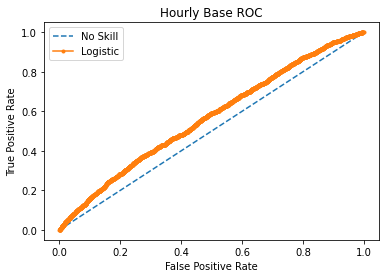

In [28]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
#labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hourly Base ROC')
plt.legend()
plt.show()

This preliminary model looks pretty good. It's predicting better than the baseline.

In [29]:
df.columns

Index(['note_id', 'alert_id', 'user_id', 'user_channels', 'message',
       'note_created_at', 'type', 'market', 'currency', 'is_active',
       'is_deleted', 'max_notifications', 'notifications', 'snooze',
       'alert_created_at', 'updated_at', 'deleted_at', 'last_checked',
       'comparison', 'value', 'operator', 'time_period', 'cur_from',
       'cur_into', 'type_as_num'],
      dtype='object')

In [30]:
df_x = df[['note_created_at', 'alert_id', 'user_id', 'user_channels', 'is_active', 'cur_from', 'cur_into', 'type_as_num', 'comparison', 'value']]

In [31]:
len(df_x.index)

3582507

In [32]:
df_x = df_x[df_x.type_as_num == 0]

In [33]:
len(df_x.index)

2276794

In [34]:
df_x.head()

,note_created_at,alert_id,user_id,user_channels,is_active,cur_from,cur_into,type_as_num,comparison,value
88,2017-01-19 01:00:03,93,1385,103,0.0,BTC,USD,0.0,buy_price,"""30min"""
89,2017-01-19 01:00:03,93,1385,113,0.0,BTC,USD,0.0,buy_price,"""30min"""
97,2017-01-19 02:00:02,93,1385,103,0.0,BTC,USD,0.0,buy_price,"""30min"""
98,2017-01-19 02:00:03,93,1385,113,0.0,BTC,USD,0.0,buy_price,"""30min"""
103,2017-01-19 03:00:07,93,1385,103,0.0,BTC,USD,0.0,buy_price,"""30min"""


In [35]:
df_x = df_x[(df_x.cur_from == 'BTC') | (df_x.cur_into == 'BTC')]

In [36]:
len(df_x.index)

1288704

In [37]:
df_x = df_x.dropna()

In [38]:
len(df_x.index)

288289

Time to try to merge dataframes!

In [39]:
df_x = df_x.rename(columns={'note_created_at':'date'})

In [40]:
df_x.set_index('date', inplace=True)
btc_hours.set_index('date', inplace=True)

In [41]:
btc_days.set_index('date', inplace=True)
btc_weeks.set_index('date', inplace=True)

In [42]:
df_x = df_x.tz_localize(None)

In [43]:
btc_hours = btc_hours.tz_localize(None)

In [44]:
final = df_x.merge(btc_hours, left_index=True, right_index=True, how='outer')

In [45]:
final.head()

,alert_id,user_id,user_channels,is_active,cur_from,cur_into,type_as_num,comparison,value,Open,High,Low,volume_btc,volume_usd,Weighted_Price,bull
date,,,,,,,,,,,,,,,,
2017-01-17 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.015893,0.010406,0.019566,0.033996,0.048332,0.015750,1.0
2017-01-17 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005681,-0.013646,-0.000799,-0.771245,-0.772519,-0.005763,1.0
2017-01-17 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.004118,0.006210,0.005404,0.235181,0.241035,0.004193,0.0
2017-01-17 11:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.001672,-0.005048,-0.006773,0.381617,0.376177,-0.001902,1.0
2017-01-17 12:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.005356,-0.002045,-0.006258,0.033769,0.028346,-0.005282,0.0


In [46]:
cols = ['Open', 'High', 'Low', 'volume_btc', 'volume_usd', 'Weighted_Price', 'bull']
final.loc[:,cols] = final.loc[:,cols].ffill()

In [47]:
final = final.dropna()

In [48]:
final.head()

,alert_id,user_id,user_channels,is_active,cur_from,cur_into,type_as_num,comparison,value,Open,High,Low,volume_btc,volume_usd,Weighted_Price,bull
date,,,,,,,,,,,,,,,,
2017-01-19 01:00:03,93.0,1385.0,103.0,0.0,BTC,USD,0.0,buy_price,"""30min""",-0.000886,-0.004565,-0.003271,-0.630507,-0.631206,-0.000914,1.0
2017-01-19 01:00:03,93.0,1385.0,113.0,0.0,BTC,USD,0.0,buy_price,"""30min""",-0.000886,-0.004565,-0.003271,-0.630507,-0.631206,-0.000914,1.0
2017-01-19 02:00:02,93.0,1385.0,103.0,0.0,BTC,USD,0.0,buy_price,"""30min""",-0.007214,-0.005595,-0.005533,-0.445836,-0.449387,-0.007117,0.0
2017-01-19 02:00:03,93.0,1385.0,113.0,0.0,BTC,USD,0.0,buy_price,"""30min""",-0.007214,-0.005595,-0.005533,-0.445836,-0.449387,-0.007117,0.0
2017-01-19 03:00:07,93.0,1385.0,103.0,0.0,BTC,USD,0.0,buy_price,"""30min""",0.003640,0.002785,0.005552,-0.048507,-0.044435,0.003639,0.0


In [49]:
final.comparison.unique()

array(['buy_price', 'sell_price', 'low_price', 'high_price', 'volume'],
      dtype=object)

In [50]:
final['value'] = final.value.replace({' "30min"':0, ' "1h"':1, ' "1day"':6, ' "2h"':2, ' "6h"':4, ' "12h"':5,
       ' "3h"':3, ' "3day"':7, ' "1week"':8}, regex=True)

In [51]:
final['comparison'] = final.comparison.replace({'buy_price':0, 'sell_price':1, 'low_price':2, 'high_price':3, 'volume':4}, regex=True)

In [52]:
final.head()

,alert_id,user_id,user_channels,is_active,cur_from,cur_into,type_as_num,comparison,value,Open,High,Low,volume_btc,volume_usd,Weighted_Price,bull
date,,,,,,,,,,,,,,,,
2017-01-19 01:00:03,93.0,1385.0,103.0,0.0,BTC,USD,0.0,0,0,-0.000886,-0.004565,-0.003271,-0.630507,-0.631206,-0.000914,1.0
2017-01-19 01:00:03,93.0,1385.0,113.0,0.0,BTC,USD,0.0,0,0,-0.000886,-0.004565,-0.003271,-0.630507,-0.631206,-0.000914,1.0
2017-01-19 02:00:02,93.0,1385.0,103.0,0.0,BTC,USD,0.0,0,0,-0.007214,-0.005595,-0.005533,-0.445836,-0.449387,-0.007117,0.0
2017-01-19 02:00:03,93.0,1385.0,113.0,0.0,BTC,USD,0.0,0,0,-0.007214,-0.005595,-0.005533,-0.445836,-0.449387,-0.007117,0.0
2017-01-19 03:00:07,93.0,1385.0,103.0,0.0,BTC,USD,0.0,0,0,0.003640,0.002785,0.005552,-0.048507,-0.044435,0.003639,0.0


In [53]:
final.columns

Index(['alert_id', 'user_id', 'user_channels', 'is_active', 'cur_from',
       'cur_into', 'type_as_num', 'comparison', 'value', 'Open', 'High', 'Low',
       'volume_btc', 'volume_usd', 'Weighted_Price', 'bull'],
      dtype='object')

In [54]:
X = final[['user_id', 'user_channels', 'is_active', 'type_as_num', 'comparison', 'value', 'Open', 'High', 'Low',
       'volume_btc', 'volume_usd', 'Weighted_Price']]
y = final['bull']

In [55]:
#We'll train test split this with a test size of 20%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=200)

In [56]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [57]:
model_score = model.score(X_test, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity_c_h = tn / (tn+fp)
sensitivity_c_h = tp / (tp+fn)
print('Specificity:', specificity_b_h, specificity_c_h), print('Accuracy:', base_score, model_score),
print('Sensitivity:', sensitivity_b_h, sensitivity_c_h)

Specificity: 0.17768871075484302 0.0
Accuracy: 0.5431979368149581 0.5210205001907802
Sensitivity: 0.8841121495327103 1.0


Alright so this model does not work well at all and is actually confounding the base model. Let's graph the Receiver Operating Characteristic (ROC) curve.

In [58]:
#Get no skill prediction
ns_probs = [0 for _ in range(len(y_test))]

# We predict probabilities and keep probabilities for the positive outcome only
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

#Now we calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

#Summarize scores
('No Skill: ROC AUC=%.3f' % (ns_auc)), ('Logistic: ROC AUC=%.3f' % (lr_auc))

('No Skill: ROC AUC=0.500', 'Logistic: ROC AUC=0.484')

In [59]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

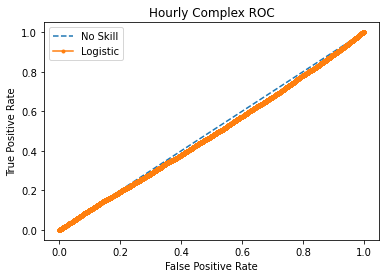

In [60]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
#labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hourly Complex ROC')
plt.legend()
plt.show()

This is actually worse than our baseline. Let's try a far more simple addition, using just the number of notes made during the time frames. We'll do this for hours, days, and possibly weeks which means most of our steps will be done in triplicate.

In [61]:
notes_count_per_H = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\Modeling\notes_count_per_H.csv')
notes_count_per_D = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\Modeling\notes_count_per_D.csv')
notes_count_per_W = pd.read_csv(r'C:\Users\agrae\Documents\AAA_Work\Coding\Springboard\HW\000_Capstone_3\Data\Modeling\notes_count_per_W.csv')

In [62]:
notes_count_per_H['created_at'] = pd.to_datetime(notes_count_per_H.created_at)
notes_count_per_D['created_at'] = pd.to_datetime(notes_count_per_D.created_at)
notes_count_per_W['created_at'] = pd.to_datetime(notes_count_per_W.created_at)

In [63]:
notes_count_per_H.set_index('created_at', inplace=True)
notes_count_per_D.set_index('created_at', inplace=True)
notes_count_per_W.set_index('created_at', inplace=True)

In [64]:
notes_count_per_H['message_zscore'] = (notes_count_per_H.message - notes_count_per_H.message.mean())/notes_count_per_H.message.std(ddof=0)
notes_count_per_D['message_zscore'] = (notes_count_per_D.message - notes_count_per_D.message.mean())/notes_count_per_D.message.std(ddof=0)
notes_count_per_W['message_zscore'] = (notes_count_per_W.message - notes_count_per_W.message.mean())/notes_count_per_W.message.std(ddof=0)

In [65]:
notes_count_per_H.head()

,message,message_zscore
created_at,,
2017-01-17 07:00:00,3,-0.609815
2017-01-17 08:00:00,4,-0.604399
2017-01-17 09:00:00,1,-0.620648
2017-01-17 10:00:00,1,-0.620648
2017-01-17 11:00:00,1,-0.620648


In [66]:
notes_count_per_H = notes_count_per_H.tz_localize(None)
notes_count_per_D = notes_count_per_D.tz_localize(None)
notes_count_per_W = notes_count_per_W.tz_localize(None)
btc_days = btc_days.tz_localize(None)
btc_weeks = btc_weeks.tz_localize(None)

In [67]:
df_simple_H = notes_count_per_H.merge(btc_hours, left_index=True, right_index=True, how='inner')
df_simple_D = notes_count_per_D.merge(btc_days, left_index=True, right_index=True, how='inner')
df_simple_W = notes_count_per_W.merge(btc_weeks, left_index=True, right_index=True, how='inner')

In [68]:
df_simple_H.head()

,message,message_zscore,Open,High,Low,volume_btc,volume_usd,Weighted_Price,bull
2017-01-17 08:00:00,4,-0.604399,0.015893,0.010406,0.019566,0.033996,0.048332,0.015750,1.0
2017-01-17 09:00:00,1,-0.620648,-0.005681,-0.013646,-0.000799,-0.771245,-0.772519,-0.005763,1.0
2017-01-17 10:00:00,1,-0.620648,0.004118,0.006210,0.005404,0.235181,0.241035,0.004193,0.0
2017-01-17 11:00:00,1,-0.620648,-0.001672,-0.005048,-0.006773,0.381617,0.376177,-0.001902,1.0
2017-01-17 12:00:00,1,-0.620648,-0.005356,-0.002045,-0.006258,0.033769,0.028346,-0.005282,0.0


In [69]:
df_simple_H.columns

Index(['message', 'message_zscore', 'Open', 'High', 'Low', 'volume_btc',
       'volume_usd', 'Weighted_Price', 'bull'],
      dtype='object')

In [70]:
X_S_H = df_simple_H[['message_zscore', 'Open', 'High', 'Low', 'volume_btc', 'volume_usd',
       'Weighted_Price']]
y_S_H = df_simple_H['bull']

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X_S_H, y_S_H, test_size=.2, random_state=200)

In [72]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [73]:
simple_score_h = model.score(X_test, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity_s_h = tn / (tn+fp)
sensitivity_s_h = tp / (tp+fn)
print('Specificity:', specificity_b_h, specificity_s_h), print('Accuracy:', base_score, simple_score_h),
print('Sensitivity:', sensitivity_b_h, sensitivity_s_h)

Specificity: 0.17768871075484302 0.21932830705962988
Accuracy: 0.5431979368149581 0.552669785449266
Sensitivity: 0.8841121495327103 0.8491313623895154


We've improved upong the baseline! Let's get the ROC curve before moving on.

In [74]:
#Get no skill prediction
ns_probs = [0 for _ in range(len(y_test))]

In [75]:
# We predict probabilities and keep probabilities for the positive outcome only
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

In [76]:
#Now we calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

#Summarize scores
('No Skill: ROC AUC=%.3f' % (ns_auc)), ('Logistic: ROC AUC=%.3f' % (lr_auc))

('No Skill: ROC AUC=0.500', 'Logistic: ROC AUC=0.566')

In [77]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

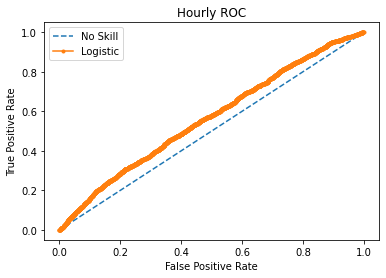

In [78]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
#labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Hourly ROC')
plt.legend()
plt.show()

The ROC curve looks really good! Let's try to classify in days instead.

In [79]:
notes_count_per_D['message_zscore'] = (notes_count_per_D.message - notes_count_per_D.message.mean())/notes_count_per_D.message.std(ddof=0)

In [80]:
df_simple_D = notes_count_per_D.merge(btc_days, left_index=True, right_index=True, how='inner')

In [81]:
X_D = btc_days.drop(['bull'], axis=1)
y_D = btc_days['bull']

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X_D, y_D, test_size=.2, random_state=200)

In [83]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [84]:
y_pred_all = model.predict(X_D)
btc_days_pred = btc_days.copy()
btc_days_pred['pred'] = y_pred_all
btc_days_pred = btc_days_pred[btc_days_pred.pred == 1]

In [85]:
inv = 100
for x in btc_days_pred.Open:
    inv = inv + inv*x
inv

9306985.855918482

In [86]:
base_score_d = model.score(X_test, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity_b_d = tn / (tn+fp)
sensitivity_b_d = tp / (tp+fn)
print('Specificity:', specificity_b_d), print('Accuracy:', base_score_d),
print('Sensitivity:', sensitivity_b_d)

Specificity: 0.20930232558139536
Accuracy: 0.5637065637065637
Sensitivity: 0.9153846153846154


Our accuracy has gone down a little, probably because we have less data because of its resampling. Let's make an ROC curve to give us a better look at the data.

In [87]:
#Get no skill prediction
ns_probs = [0 for _ in range(len(y_test))]

In [88]:
# We predict probabilities and keep probabilities for the positive outcome only
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

In [89]:
#Now we calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

In [90]:
#Summarize scores
('No Skill: ROC AUC=%.3f' % (ns_auc)), ('Logistic: ROC AUC=%.3f' % (lr_auc))

('No Skill: ROC AUC=0.500', 'Logistic: ROC AUC=0.610')

In [91]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

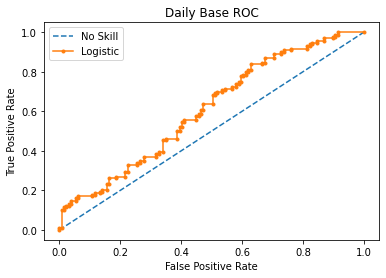

In [92]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
#labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Daily Base ROC')
plt.legend()
plt.show()

We now have a new basescore in days. Let's use our other day data and see the results.

In [93]:
X_S_D = df_simple_D[['message_zscore', 'Open', 'High', 'Low', 'volume_btc', 'volume_usd',
       'Weighted_Price']]
y_S_D = df_simple_D['bull']

In [94]:
X_train, X_test, y_train, y_test = train_test_split(X_S_D, y_S_D, test_size=.2, random_state=200)

In [95]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [96]:
simple_score_d = model.score(X_test, y_test)
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
specificity_s_d = tn / (tn+fp)
sensitivity_s_d = tp / (tp+fn)
print('Specificity:', specificity_b_d, specificity_s_d), print('Accuracy:', base_score_d, simple_score_d),
print('Sensitivity:', sensitivity_b_d, sensitivity_s_d)

Specificity: 0.20930232558139536 0.19852941176470587
Accuracy: 0.5637065637065637 0.562015503875969
Sensitivity: 0.9153846153846154 0.9672131147540983


In [97]:
#Get no skill prediction
ns_probs = [0 for _ in range(len(y_test))]

# We predict probabilities and keep probabilities for the positive outcome only
lr_probs = model.predict_proba(X_test)
lr_probs = lr_probs[:, 1]

#Now we calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

#Summarize scores
('No Skill: ROC AUC=%.3f' % (ns_auc)), ('Logistic: ROC AUC=%.3f' % (lr_auc))

('No Skill: ROC AUC=0.500', 'Logistic: ROC AUC=0.642')

In [98]:
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

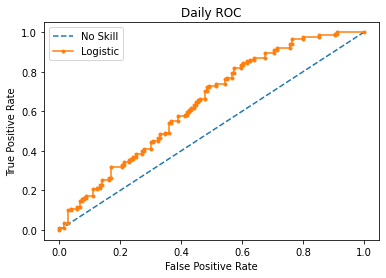

In [99]:
# plot the roc curve for the model
plt.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
plt.plot(lr_fpr, lr_tpr, marker='.', label='Logistic')
#labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Daily ROC')
plt.legend()

plt.show()

These graphs all look pretty great! It looks like our data pool is shrinking dangerously low with it in days. I think we won't use weeks for now but might look into it when the scope of our project increases. Let's check to see if there might be an overwhelming number of positives in our sample. If there are then we might get more information out of a Precision-Recall plot.

In [100]:
btc_days.bull.sum(), len(btc_days.index)

(703.0, 1291)

In [101]:
703/1291

0.5445391169635941

That also looks fine! Obviously we can expand the project in the future but for now this should be enough information.

In [102]:
specificity_b_h, specificity_s_h, specificity_b_d, specificity_s_h,  

(0.17768871075484302,
 0.21932830705962988,
 0.20930232558139536,
 0.21932830705962988)